# **Airbnb Open Data**

## **Descrição**

A plataforma Airbnb, é um site/aplicativo disponível tanto para computadores, quanto para celulares, que surgiu com a proposta de facilitar a vida as pessoas que buscam alugar imóveis em diversas partes do mundo, e ao mesmo tempo que traz ao dono do imóvel uma forma prática de gerenciar seus imóveis. O app permite a visualização do interior do imóvel, alem de descrições que possibilitam uma avaliação a distância, e com um único clique proceder com a reserva. O dataset analizado possui 102599 linhas e 26 colunas descritas abaixo:

Id: Número de identificação único reservado para um anúncio na plataforma Airbnb.  
Name: Título do anúncio registrado na plataforma Airbnb.  
Host Id: Número de identificação único reservado para cada anfitrião na plataforma Airbnb.  
Host Identity Verified: indicação da confirmação da verificação de identidade para cada anfitrião na plataforma Airbnb.  
Host Name: Primeiro nome do anfitrião.  
Neighbourhood Group: Nome da região/zona da localização do imóvel.  
Neighbourhood: Nome do bairro da localização do imóvel.  
Lat: Número da Latitude da localização do imóvel.  
Long: Número da longitude da localização do imóvel.  
Country: Nome do país da localização do imóvel.  
Country Code: Código do país da localização do imóvel.  
Instant Bookable: Número indicador da disponibilidade de reserva instantâneo do imóvel.   
Cancellation Policy: Indicador do grau de severidade da política de cancelamento do imóvel.  
Room Type: Número indicador do tipo de quarto disponíbilizado no imóvel.  
Construction Year: Ano de construção do imóvel.  
Price: Valor pago pelo dia da locação do imóvel.  
Service Fee: Valor total da taxa de serviço paga no ato da locação do imóvel.  
Minimum Nights: Quantidade total de noites mínimas necessárias para a locação do imóvel.  
Number Of Reviews: Quantidade total de avaliações recebida pelo imóvel na plataforma Airbnb.  
Last Review: Data da última avaliação recebida pelo imóvel na plataforma Airbnb.  
Reviews Per Month: Taxa de avaliações recebida por mes desde a criação do anúncio.  
Review Rate Number: Valor médio da nota recebida pelo anúncio na plataforma Airbnb.  
Calculated Host Listings Count: Número total de anúncios feito pelo mesmo anfitrião na plataforma Airbnb.  
Availability 365: Número total de dias até a disponibilização do imóvel para locação.  
House Rules: Regras únicas para a utilização do imóvel editadas pelo anfitrião.  
License: Código único da licensa do imóvel informada pelo anfitrião.  

Para uma melhorar visualização dos resultados em cada células, será criado um separador.

In [ ]:
# Separadores
def div(sep = 1):
    if sep == 1:
        print("-"*130)
    if sep == 2:
        print("="*100)
    if sep == 3:
        print("-"*70)

## **Importação de bibliotecas**

Serão utilizadas as bibliotecas pandas para importação e manipulação do datasets, numpy para calculos matematicos e estatisticos e seaborn para visualização gráfica dos dados.

In [ ]:
%pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import folium as flm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS

# Para visualizar com wsl:
# import os
# import subprocess as sbp
# import webbrowser

In [ ]:
pd.set_option("display.max_columns", None)

O dataset utilizado é o `Airbnb_Open_Data.csv` retirado da base da dados do Kaggle: 'https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata?select=Airbnb_Open_Data.csv'.  

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Airbnb_Open_Data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arianazmoudeh/airbnbopendata",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())
div()
print(df.info())
div()
print("Total de valores únicos em cada coluna:\n" + str(df.nunique(dropna=False)))

/tmp/ipykernel_1583/668331377.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


/home/cerbellus/envs/dados/lib/python3.12/site-packages/kagglehub/pandas_datasets.py:91: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  result = read_function(


First 5 records:         id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country country code instant_bookable  \
0  40.64749 -73.9

## **Limpeza de dados**

Os nomes das colunas não seguem um único padrão de formatação, com catacteres variando entre upper e lower aleatóriamente, além de underlines em substituição a backspaces. Formatações aleatórias geram dificuldades de acesso as colunas, e tornam desagradável e confusa a estética visual do dataframe. Afim de padronizar, os caracteres underlines serão substituídos por backspaces, e será utilizado o método `title` para converter as iniais de cada palavra em caixa alta.

In [ ]:
print("Valores antes da limpeza:")
print(df.columns)
div()
df.columns = df.columns.str.replace("_", " ").str.strip().str.title()
div()
print("Valores após da limpeza:")
print(df.columns)

Valores antes da limpeza:
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
Valores após da limpeza:
Index(['Id', 'Name', 'Host Id', 'Host Identity Verified', 'Host Name',
       'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country',
       'Country Code', 'Instant Bookable', 'Can

Para remover duplicatas, é utilizado o comando `drop_duplicates`. Este método irá remover somente as linhas, em que todos os items das colunas se repetirem.

In [ ]:
print("Valores antes da limpeza:")
print("* Total de linhas do dataframe: " + str(df.shape[0]))
print("* Total de linhas duplicadas: " + str(df[df.duplicated()].shape[0]))
div()
df.drop_duplicates(inplace=True)
div()
print("Valores antes da limpeza:")
print("* Total de linhas do dataframe: " + str(df.shape[0]))
print("* Total de linhas duplicadas: " + str(df[df.duplicated()].shape[0]))

Valores antes da limpeza:
* Total de linhas do dataframe: 102599


* Total de linhas duplicadas: 541
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
Valores antes da limpeza:
* Total de linhas do dataframe: 102058
* Total de linhas duplicadas: 0


As colunas `Country` e `Country Code` possuem valores que são redundantes para a analise do dataframe, o que torna seus dados irrelevantes na obtenção de insights, além disso as colunas `Name, Host Name`, `Last Review`, `House Rules e License` contêm valores nulos em demasiado, o que pode comprometer a qualidade da análise, além de tambem nao trazerem informações úteis, essas colunas serão todas descartadas usando o metodo `drop`.

In [ ]:
print("Valores antes da limpeza:")
print("* Valores únicos de cada coluna: " + str(df.columns.tolist()))
print("* Total de colunas do dataframe: " + str(df.shape[1]))
div()
if ("Name" in df.columns):
    df.drop(columns=["Name"], inplace=True)
    print("Valores removidos com sucesso!")
if ("Host Name" in df.columns):
    df.drop(columns=["Host Name"], inplace=True)
    print("Valores removidos com sucesso!")
if ("Country" in df.columns):
    df.drop(columns=["Country"], inplace=True)
    print("Valores removidos com sucesso!")
if ("Country Code" in df.columns):
    df.drop(columns=["Country Code"], inplace=True)
    print("Valores removidos com sucesso!")
if ("Last Review" in df.columns):
    df.drop(columns=["Last Review"], inplace=True) 
    print("Valores removidos com sucesso!")
if ("House Rules" in df.columns):
    df.drop(columns=["House Rules"], inplace=True)
    print("Valores removidos com sucesso!")
if ("License" in df.columns):
    df.drop(columns=["License"], inplace=True) 
    print("Valores removidos com sucesso!")
div()
print("Valores após a limpeza:")
print("* Valores únicos de cada coluna: " + str(df.columns.tolist()))
print("* Total de colunas do dataframe: " + str(df.shape[1]))

Valores antes da limpeza:
* Valores únicos de cada coluna: ['Id', 'Name', 'Host Id', 'Host Identity Verified', 'Host Name', 'Neighbourhood Group', 'Neighbourhood', 'Lat', 'Long', 'Country', 'Country Code', 'Instant Bookable', 'Cancellation Policy', 'Room Type', 'Construction Year', 'Price', 'Service Fee', 'Minimum Nights', 'Number Of Reviews', 'Last Review', 'Reviews Per Month', 'Review Rate Number', 'Calculated Host Listings Count', 'Availability 365', 'House Rules', 'License']
* Total de colunas do dataframe: 26
----------------------------------------------------------------------------------------------------------------------------------
Valores removidos com sucesso!
Valores removidos com sucesso!
Valores removidos com sucesso!
Valores removidos com sucesso!
Valores removidos com sucesso!
Valores removidos com sucesso!
Valores removidos com sucesso!
----------------------------------------------------------------------------------------------------------------------------------
V

A coluna `Host Identity Verified` indica se o anfitrião do imóvel fez a verificação de identidade, com o objetivo de verificar a autenticidade dos dados. Os valores nulos desta coluna serão substituídos por unconfirmed, indicando a não verificação, e tambem será utilizado o método `capitalize` para colocar a primeira letra em caixa alta. 

In [ ]:
print("Valores antes da limpeza:")
print("* Host Identity Verified - Valores únicos: " + str(df["Host Identity Verified"].unique().tolist()))
print("* Host Identity Verified - Total de valores únicos: " + str(df["Host Identity Verified"].nunique(dropna=False)))
print("* Host Identity Verified - Total de valores nulos: " + str(df["Host Identity Verified"].isna().sum()))
div()
df.fillna({"Host Identity Verified": "unconfirmed"}, inplace=True)
df["Host Identity Verified"] = df["Host Identity Verified"].str.strip().str.capitalize()
div()
print("Valores após a limpeza:")
print("* Host Identity Verified - Valores únicos: " + str(df["Host Identity Verified"].unique().tolist()))
print("* Host Identity Verified - Total de valores únicos: " + str(df["Host Identity Verified"].nunique(dropna=False)))
print("* Host Identity Verified - Total de valores nulos: " + str(df["Host Identity Verified"].isna().sum()))

Valores antes da limpeza:
* Host Identity Verified - Valores únicos: ['unconfirmed', 'verified', nan]
* Host Identity Verified - Total de valores únicos: 3
* Host Identity Verified - Total de valores nulos: 289
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Host Identity Verified - Valores únicos: ['Unconfirmed', 'Verified']
* Host Identity Verified - Total de valores únicos: 2
* Host Identity Verified - Total de valores nulos: 0


A coluna `Neighbourhood Group` informa a zona/região de uma cidade localizada nos Estados Unidos. Nesta coluna exitem valores incorretos que serão corrigidos por meio do método `replace`, além disso existem valores nulos que podem ser tratados, tomando como referencia os bairros extraidos da coluna 'Neighbourhood', em seguida realizar a atualização de seus valores com o metodo `fillna`.

In [ ]:
df2 = df.copy()
a = df2.loc[df2["Neighbourhood Group"].isna(), "Neighbourhood"]

In [ ]:
index_ngnan = df.loc[df["Neighbourhood Group"].isna(), ["Neighbourhood", "Neighbourhood Group"]].drop_duplicates(subset="Neighbourhood").index.tolist()
df["Neighbourhood Group"] = df["Neighbourhood Group"].str.strip().str.title().replace("Brookln", "Brooklyn").replace("Manhatan", "Manhattan")
print("* Neighbourhood Group - Valores únicos: " + str(df["Neighbourhood Group"].sort_values().unique()))
print("* Neighbourhood Group - Total de valores únicos: " + str(df["Neighbourhood Group"].nunique(dropna=False)))
print("* Neighbourhood Group - Total de valores nulos: " + str(df["Neighbourhood Group"].isna().sum()))
div(3)
print("* Neighbourhood Group - Valores nulos:\n" + str(df.loc[index_ngnan, ["Neighbourhood", "Neighbourhood Group"]]))
div()
ngnan = df.loc[df["Neighbourhood Group"].isna(), "Neighbourhood"]
ngnan_n = df["Neighbourhood"].isin(ngnan)
ng_filter = df.loc[df["Neighbourhood Group"].notna(), ["Neighbourhood", "Neighbourhood Group"]].drop_duplicates(subset="Neighbourhood").set_index("Neighbourhood")["Neighbourhood Group"]
df.loc[ngnan_n, "Neighbourhood Group"] = df.loc[ngnan_n, "Neighbourhood"].map(ng_filter)
div()
print("* Neighbourhood Group - Valores únicos: " + str(df["Neighbourhood Group"].sort_values().unique()))
print("* Neighbourhood Group - Total de valores únicos: " + str(df["Neighbourhood Group"].nunique(dropna=False)))
print("* Neighbourhood Group - Total de valores nulos: " + str(df["Neighbourhood Group"].isna().sum()))
div(3)
print("* Neighbourhood Group - Valores nulos:\n" + str(df.loc[index_ngnan, ["Neighbourhood", "Neighbourhood Group"]]))

* Neighbourhood Group - Valores únicos: ['Bronx' 'Brooklyn' 'Manhattan' 'Queens' 'Staten Island' nan]
* Neighbourhood Group - Total de valores únicos: 6
* Neighbourhood Group - Total de valores nulos: 29
----------------------------------------------------------------------
* Neighbourhood Group - Valores nulos:
            Neighbourhood Neighbourhood Group
74     Washington Heights                 NaN
75           Clinton Hill                 NaN
76           East Village                 NaN
77        Upper East Side                 NaN
78               Woodside                 NaN
90           Williamsburg                 NaN
91               Bushwick                 NaN
92       Prospect Heights                 NaN
196               Chelsea                 NaN
241           East Harlem                 NaN
262           Eastchester                 NaN
295                Harlem                 NaN
307             Chinatown                 NaN
361        Queens Village                 

A coluna `Neighbourhood` informa os bairros de regiões dos Estados Unidos. Seus valores nulos são dificeis de substituir por falta de referencia em outras colunas. Esses valores nulos serão removidos com o método `dropna`.

In [ ]:
print("Valores antes da limpeza:")
print("* Neighbourhood - Total de valores únicos: " + str(df["Neighbourhood"].nunique(dropna=False)))
print("* Neighbourhood - Total de valores nulos: " + str(df["Neighbourhood"].isna().sum()))
div()
df.dropna(subset="Neighbourhood", inplace=True)
div()
print("Valores após a limpeza:")
print("* Neighbourhood - Total de valores únicos: " + str(df["Neighbourhood"].nunique(dropna=False)))
print("* Neighbourhood - Total de valores nulos: " + str(df["Neighbourhood"].isna().sum()))

Valores antes da limpeza:
* Neighbourhood - Total de valores únicos: 225
* Neighbourhood - Total de valores nulos: 16
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Neighbourhood - Total de valores únicos: 224
* Neighbourhood - Total de valores nulos: 0


As colunas `Lat` e `Long` possuem as mesmas quantidades de valores nulos, e tambem estão localizadas nas mesmas linhas, estes valores são impossíveis de serem substituídos, já que são únicos em cada localização. Seus valores serão removidos com o método `dropna`.

In [ ]:
print("Valores antes da limpeza:")
print("* Lat - Total de valores únicos: " + str(df["Lat"].nunique(dropna=False)))
print("* Lat - Total de valores nulos: " + str(df["Lat"].isna().sum()))
print("* Long - Total de valores únicos:  " + str(df["Long"].nunique(dropna=False)))
print("* Long - Total de valores nulos:  " + str(df["Long"].isna().sum()))
div()
df.dropna(subset="Lat", inplace=True)
div()
print("Valores após a limpeza:")
print("* Lat - Total de valores únicos: " + str(df["Lat"].nunique(dropna=False)))
print("* Lat - Total de valores nulos: " + str(df["Lat"].isna().sum()))
print("* Long - Total de valores únicos:  " + str(df["Long"].nunique(dropna=False)))
print("* Long - Total de valores nulos:  " + str(df["Long"].isna().sum()))

Valores antes da limpeza:
* Lat - Total de valores únicos: 21992
* Lat - Total de valores nulos: 8
* Long - Total de valores únicos:  17775
* Long - Total de valores nulos:  8
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Lat - Total de valores únicos: 21991
* Lat - Total de valores nulos: 0
* Long - Total de valores únicos:  17774
* Long - Total de valores nulos:  0


A coluna `Instant Bookable` indica a possibilidade de reserva instantânea do imóvel. Esta coluna é composta de valores booleanos. Quando não há preenchimento, posso assumir que esse tipo de agendamento não seja permitido, então seus valores nulos serão substituidos por False.

In [ ]:
print("Valores antes da limpeza:")
print("* Instant Bookable - Valores unicos: " + str(df["Instant Bookable"].unique().tolist()))
print("* Instant Bookable - Total de valores únicos: " + str(df["Instant Bookable"].nunique(dropna=False)))
print("* Instant Bookable - Total de valores nulos: " + str(df["Instant Bookable"].isna().sum()))
div()
df["Instant Bookable"] = df["Instant Bookable"].astype(bool)
df.fillna({"Instant Bookable": False}, inplace=True)
div()
print("Valores após a limpeza:")
print("* Instant Bookable - Valores unicos: " + str(df["Instant Bookable"].unique().tolist()))
print("* Instant Bookable - Total de valores únicos: " + str(df["Instant Bookable"].nunique(dropna=False)))
print("* Instant Bookable - Total de valores nulos: " + str(df["Instant Bookable"].isna().sum()))

Valores antes da limpeza:
* Instant Bookable - Valores unicos: [False, True, nan]
* Instant Bookable - Total de valores únicos: 3
* Instant Bookable - Total de valores nulos: 103
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Instant Bookable - Valores unicos: [False, True]
* Instant Bookable - Total de valores únicos: 2
* Instant Bookable - Total de valores nulos: 0


A coluna `Cancellation Policy` informa o grau de severidade da quebra de contrato para cada Airbnb. Nesta coluna existem valores nulos serão substituídos pelo valor categórico que mais se repete, obtido através do modo estatístico, em seguida a primeira letra de cada palavra será colocada em caixa alta com o metrodo `capitalize`.

In [ ]:
print("Valores antes da limpeza:")
print("* Cancellation Policy - Valores únicos: " + str(df["Cancellation Policy"].unique().tolist()))
print("* Cancellation Policy - Total de valores únicos: " + str(df["Cancellation Policy"].nunique(dropna=False)))
print("* Cancellation Policy - Valores nulos: " + str(df["Cancellation Policy"].isna().sum()))
div()
cancel_mode = df["Cancellation Policy"].mode()[0]
df.fillna({"Cancellation Policy": cancel_mode}, inplace=True)
df["Cancellation Policy"] = df["Cancellation Policy"].str.strip().str.capitalize()
print("Cancellation Policy - Valor do modo: " + str(cancel_mode))
div()
print("Valores após a limpeza:")
print("* Cancellation Policy - Valores únicos: " + str(df["Cancellation Policy"].unique().tolist()))
print("* Cancellation Policy - Total de valores únicos: " + str(df["Cancellation Policy"].nunique(dropna=False)))
print("* Cancellation Policy - Valores nulos: " + str(df["Cancellation Policy"].isna().sum()))

Valores antes da limpeza:
* Cancellation Policy - Valores únicos: ['strict', 'moderate', 'flexible', nan]
* Cancellation Policy - Total de valores únicos: 4
* Cancellation Policy - Valores nulos: 74
----------------------------------------------------------------------------------------------------------------------------------


Cancellation Policy - Valor do modo: moderate
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Cancellation Policy - Valores únicos: ['Strict', 'Moderate', 'Flexible']
* Cancellation Policy - Total de valores únicos: 3
* Cancellation Policy - Valores nulos: 0


A coluna `Construction Year` informa o ano de construção do imóvel. Esta coluna possui valores nulos que serão substituídos pelo valor da mediana.

In [ ]:
print("Valores antes da limpeza:")
print("* Construction Year - Valores únicos: " + str(df["Construction Year"].nunique(dropna=False)))
print("* Construction Year - Valores nulos: " + str(df["Construction Year"].isna().sum()))
div()
median_year = int(df["Construction Year"].median())
df.fillna({"Construction Year": median_year}, inplace=True)
df["Construction Year"] = df["Construction Year"].astype(int)
print("Construction Year - min: " + str(df["Construction Year"].min()) + "\nConstruction Year - max: " + str(df["Construction Year"].max()))
print("Construction Year - Valor da média: " + str(median_year))
div()
print("Valores após a limpeza:")
print("* Construction Year - Valores únicos: " + str(df["Construction Year"].nunique(dropna=False)))
print("* Construction Year - Valores nulos: " + str(df["Construction Year"].isna().sum()))

Valores antes da limpeza:
* Construction Year - Valores únicos: 21
* Construction Year - Valores nulos: 213
----------------------------------------------------------------------------------------------------------------------------------
Construction Year - min: 2003
Construction Year - max: 2022
Construction Year - Valor da média: 2012
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Construction Year - Valores únicos: 20
* Construction Year - Valores nulos: 0


A coluna `Price` informa o preço de locação do imóvel. O principal problema desta coluna, é o simbolo monetário, que impede a conversão do valor para inteiro. O método `replace` será utilizado para remove-lo e tambem para remover a "," no campo do milhar, além disso, os valores nulos serão descartados com o método `dropna`, e a coluna será renomeada com o método `rename` e passará a indicar também o símbolo monetário.

In [ ]:
print("Valores antes da limpeza:")
print("* Price - Total de valores únicos: " + str(df["Price"].sort_values().nunique(dropna=False)))
print("* Price - Total de valores nulos: " + str(df["Price"].isna().sum()))
div()
df["Price"] = df.loc[df["Price"].notna(), "Price"].str.replace("$", "").str.replace(",", "").astype(int)
df.rename(columns={"Price": "Price In $"}, inplace=True)
df.dropna(subset="Price In $", inplace=True)
df["Price In $"] = df["Price In $"].astype(int)
print("Price In $ - min: " + str(df["Price In $"].min()) + "\nPrice In $ - max: " + str(df["Price In $"].max()))
div()
print("Valores após a limpeza:")
print("* Price In $ - Total de valores únicos: " + str(df["Price In $"].sort_values().nunique(dropna=False)))
print("* Price In $ - Total de valores nulos: " + str(df["Price In $"].isna().sum()))

Valores antes da limpeza:
* Price - Total de valores únicos: 1152
* Price - Total de valores nulos: 246
----------------------------------------------------------------------------------------------------------------------------------
Price In $ - min: 50
Price In $ - max: 1200
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Price In $ - Total de valores únicos: 1151
* Price In $ - Total de valores nulos: 0


A coluna `Service Fee` informa a taxa de serviço paga pela locação do imóvel. Esta coluna, como na coluna Price, tambem tem simbolos que impedem a conversão para inteiro, então o mesmo método será replicado, os valores nulos serão descartados, além disso a coluna será renomeada com o método `rename` e passará a indicar também o símbolo monetário.

In [ ]:
print("Valores antes da limpeza:")
print("* Service Fee - Total de valores únicos: " + str(df["Service Fee"].nunique(dropna=False)))
print("* Service Fee - Total de valores nulos: " + str(df["Service Fee"].isna().sum()))
div()
df["Service Fee"] = df.loc[df["Service Fee"].notna(), "Service Fee"].str.replace("$", "").astype(int)
df.rename(columns={"Service Fee": "Service Fee In $"}, inplace=True)
df.dropna(subset="Service Fee In $", inplace=True)
df["Service Fee In $"] = df["Service Fee In $"].astype(int)
print("Service Fee In $ - min: " + str(df["Service Fee In $"].min()) + "\nService Fee In $ - max: " + str(df["Service Fee In $"].max()))
div()
print("Valores após a limpeza:")
print("* Service Fee In $ - Total de valores únicos: " + str(df["Service Fee In $"].nunique(dropna=False)))
print("* Service Fee In $ - Total de valores nulos: " + str(df["Service Fee In $"].isna().sum()))

Valores antes da limpeza:
* Service Fee - Total de valores únicos: 232
* Service Fee - Total de valores nulos: 239
----------------------------------------------------------------------------------------------------------------------------------
Service Fee In $ - min: 10
Service Fee In $ - max: 240
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Service Fee In $ - Total de valores únicos: 231
* Service Fee In $ - Total de valores nulos: 0


A coluna `Minimum Nights` informa o valor mínimo de dias necessários para a locação do imóvel. Nesta coluna, existem valores menores que 1, o que seria incoerente ao tratar-se de dias corridos. Para corrigir essas incoerências, como o número mínimo de dias válidos é 1, então os valores negativos e nulos serão substituídos por 1.

In [ ]:
print("Valores antes da limpeza:")
print("* Minimum Nights - Total de valores únicos: " + str(df["Minimum Nights"].nunique(dropna=False)))
print("* Minimum Nights - Total de valores menores que 0: " + str(df.loc[df["Minimum Nights"]<=0, "Minimum Nights"].shape[0]))
print("* Minimum Nights - Total de valores nulos: " + str(df["Minimum Nights"].isna().sum()))
div()
df.loc[(df["Minimum Nights"] <= 0) | (df["Minimum Nights"].isna()), "Minimum Nights"] = 1
df["Minimum Nights"] = df["Minimum Nights"].astype(int)
div()
print("Valores após a limpeza:")
print("* Minimum Nights - Total de valores únicos: " + str(df["Minimum Nights"].nunique(dropna=False)))
print("* Minimum Nights - Total de valores menores que 0: " + str(df.loc[df["Minimum Nights"] <= 0, "Minimum Nights"].shape[0]))
print("* Minimum Nights - Total de valores nulos: " + str(df["Minimum Nights"].isna().sum()))

Valores antes da limpeza:
* Minimum Nights - Total de valores únicos: 154
* Minimum Nights - Total de valores menores que 0: 13
* Minimum Nights - Total de valores nulos: 399
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Minimum Nights - Total de valores únicos: 143
* Minimum Nights - Total de valores menores que 0: 0
* Minimum Nights - Total de valores nulos: 0


A coluna `Number of Reviews` informa o valor total de avaliações. Os valores nulos desta coluna serão substituídos pelo valor 0, além disso as colunas `Reviews Per Month` e `Review Rate Number`, que são infruenciadas diretamente por essa coluna, tambem serão zeradas.

In [ ]:
print("Valores antes da limpeza:")
print("* Number of Reviews - Valores nulos: " + str(df["Number Of Reviews"].isna().sum()))
div()
df.fillna({"Number Of Reviews": 0}, inplace=True)
df["Number Of Reviews"] = df["Number Of Reviews"].astype(int)
df.loc[df['Number Of Reviews'] == 0, ["Reviews Per Month", "Review Rate Number"]] = 0
print("Number of Reviews - min: " + str(df["Number Of Reviews"].min()) + "\nNumber of Reviews - max: " + str(df["Number Of Reviews"].max()))
div()
print("Valores após a limpeza:")
print("* Number of Reviews - Valores nulos: " + str(df["Number Of Reviews"].isna().sum()))

Valores antes da limpeza:
* Number of Reviews - Valores nulos: 183
----------------------------------------------------------------------------------------------------------------------------------
Number of Reviews - min: 0
Number of Reviews - max: 1024
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Number of Reviews - Valores nulos: 0


A coluna `Reviews Per Month` informa a média de avaliações recebidas por mês. Os valores nulos desta coluna serão substituídos por 0.

In [ ]:
print("Valores antes da limpeza:")
print("* Reviews Per Month - Valores únicos: " + str(df["Reviews Per Month"].nunique(dropna=False)))
print("* Reviews Per Month - Valores nulos: " + str(df["Reviews Per Month"].isna().sum()))
div()
df.fillna({"Reviews Per Month": 0}, inplace=True)
print("Reviews Per Month - min: " + str(df["Reviews Per Month"].min()) + "\nReviews Per Month - max: " + str(df["Reviews Per Month"].max()))
div()
print("Valores após a limpeza:")
print("* Reviews Per Month - Valores únicos: " + str(df["Reviews Per Month"].nunique(dropna=False)))
print("* Reviews Per Month - Valores nulos: " + str(df["Reviews Per Month"].isna().sum()))

Valores antes da limpeza:
* Reviews Per Month - Valores únicos: 1018
* Reviews Per Month - Valores nulos: 21
----------------------------------------------------------------------------------------------------------------------------------
Reviews Per Month - min: 0.0
Reviews Per Month - max: 90.0
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Reviews Per Month - Valores únicos: 1017
* Reviews Per Month - Valores nulos: 0


A coluna `Review Rate Number` informa o valor médio total de avaliação do imóvel. Os valores nulos desta coluna serão substituídos por 0.

In [ ]:
print("Valores antes da limpeza:")
print("* Review Rate Number - Valores únicos: " + str(df["Review Rate Number"].sort_values().unique().tolist()))
print("* Review Rate Number - Total de valores únicos: " + str(df["Review Rate Number"].nunique(dropna=False)))
print("* Review Rate Number - Total de valores nulos: " + str(df["Review Rate Number"].isna().sum()))
div()
tot = df["Review Rate Number"].isna().sum()
df.dropna(subset="Review Rate Number", inplace=True)
print(f"{tot - df["Review Rate Number"].isna().sum()} valores foram descartados!")
div()
print("Valores após a limpeza:")
print("* Review Rate Number - Valores únicos: " + str(df["Review Rate Number"].sort_values().unique().tolist()))
print("* Review Rate Number - Total de valores únicos: " + str(df["Review Rate Number"].nunique(dropna=False)))
print("* Review Rate Number - Total de valores nulos: " + str(df["Review Rate Number"].isna().sum()))

Valores antes da limpeza:
* Review Rate Number - Valores únicos: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, nan]
* Review Rate Number - Total de valores únicos: 7
* Review Rate Number - Total de valores nulos: 285
----------------------------------------------------------------------------------------------------------------------------------
285 valores foram descartados!
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Review Rate Number - Valores únicos: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
* Review Rate Number - Total de valores únicos: 6
* Review Rate Number - Total de valores nulos: 0


A coluna `Calculated Host Listings Count` informa o número total de anúncios na plataforma da Airbnb feitos pelo mesmo anfitrião. Nesta coluna existem valores nulos, que para trata-los será necessario verificar  não foram encontrados outros anúncios do mesmo vendedor sendo assim os valores nulos dessa coluna serão substituídos por 1, indicando anúncio único desse anfitrião.

In [ ]:
print("Valores antes da limpeza:")
print("* Calculated Host Listings Count - Total de valores únicos: " + str(df["Calculated Host Listings Count"].nunique(dropna=False)))
print("* Calculated Host Listings Count - Total de valores nulos: " + str(df["Calculated Host Listings Count"].isna().sum()))
div()
id_host_nan_list = df.loc[df["Calculated Host Listings Count"].isna(), "Host Id"]
host_count = df2["Host Id"].value_counts()
host_nan = host_count.loc[host_count.index.isin(id_host_nan_list)].sort_values(ascending=False)
print(f"'Calculated Host Listings Count' total, entre {df["Calculated Host Listings Count"].isna().sum()} 'Host Id' identificados com como nulos. \n\n{host_nan.values}")
df.fillna({"Calculated Host Listings Count": 1}, inplace=True)
df["Calculated Host Listings Count"] = df["Calculated Host Listings Count"].astype(int)
div()
print("Valores após a limpeza:")
print("* Calculated Host Listings Count - Total de valores únicos: " + str(df["Calculated Host Listings Count"].nunique(dropna=False)))
print("* Calculated Host Listings Count - Total de valores nulos: " + str(df["Calculated Host Listings Count"].isna().sum()))

Valores antes da limpeza:
* Calculated Host Listings Count - Total de valores únicos: 79
* Calculated Host Listings Count - Total de valores nulos: 261
----------------------------------------------------------------------------------------------------------------------------------


'Calculated Host Listings Count' total, entre 261 'Host Id' identificados com como nulos. 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Calculated Host Listings Count - Total de valores únicos: 78
* Calculated Host Listings Count - Total de valores nulos: 0


A coluna `Availability 365` informa o valor total de dias até a disponibilização do imóvel para locação. Nesta coluna existem tanto valores nulos, quanto valores menores que 0 e maiores que 365. Valores nulos e menor que 0, serão substituídos por 0, ja valores maiores que 365, serão substituídos por 365.

In [ ]:
print("Valores antes da limpeza:")
print("* Availability 365 - Total de valores menores que 0: " + str(df.loc[df["Availability 365"] < 0, "Availability 365"].count()))
print("* Availability 365 - Total de valores únicos: " + str(df["Availability 365"].nunique(dropna=False)))
print("* Availability 365 - Total de valores nulos: " + str(df["Availability 365"].isna().sum()))
print("* Availability 365 - Total de valores maiores que 365: " + str((df["Availability 365"] > 365).value_counts().get(True, 0)))
div()
df.loc[df["Availability 365"] < 0, "Availability 365"] = 0
df.fillna({"Availability 365": 0}, inplace=True)
df.loc[df["Availability 365"] > 365, "Availability 365"] = 365
df["Availability 365"] = df["Availability 365"].astype(int)
div()
print("Valores após a limpeza:")
print("* Availability 365 - Total de valores menores que 0: " + str(df.loc[df["Availability 365"] < 0, "Availability 365"].count()))
print("* Availability 365 - Total de valores únicos: " + str(df["Availability 365"].nunique(dropna=False)))
print("* Availability 365 - Total de valores nulos: " + str(df["Availability 365"].isna().sum()))
print("* Availability 365 - Total de valores maiores que 365: " + str((df["Availability 365"] > 365).value_counts().get(True, 0)))

Valores antes da limpeza:
* Availability 365 - Total de valores menores que 0: 428
* Availability 365 - Total de valores únicos: 439
* Availability 365 - Total de valores nulos: 435
* Availability 365 - Total de valores maiores que 365: 2719
----------------------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------------------
Valores após a limpeza:
* Availability 365 - Total de valores menores que 0: 0
* Availability 365 - Total de valores únicos: 366
* Availability 365 - Total de valores nulos: 0
* Availability 365 - Total de valores maiores que 365: 0


Para otimizar as colunas que com poucos valores únicos, nestas colunas, será feita a conversão para o tipo `category`.

## **Visualizações**

Por meio do mapa de calor, é possível verificar de forma visual, a correlação entre os valores numéricos do dataframe, para expandir a analise, alguns valores nominais, podem ser convertidos em valores categóricos.

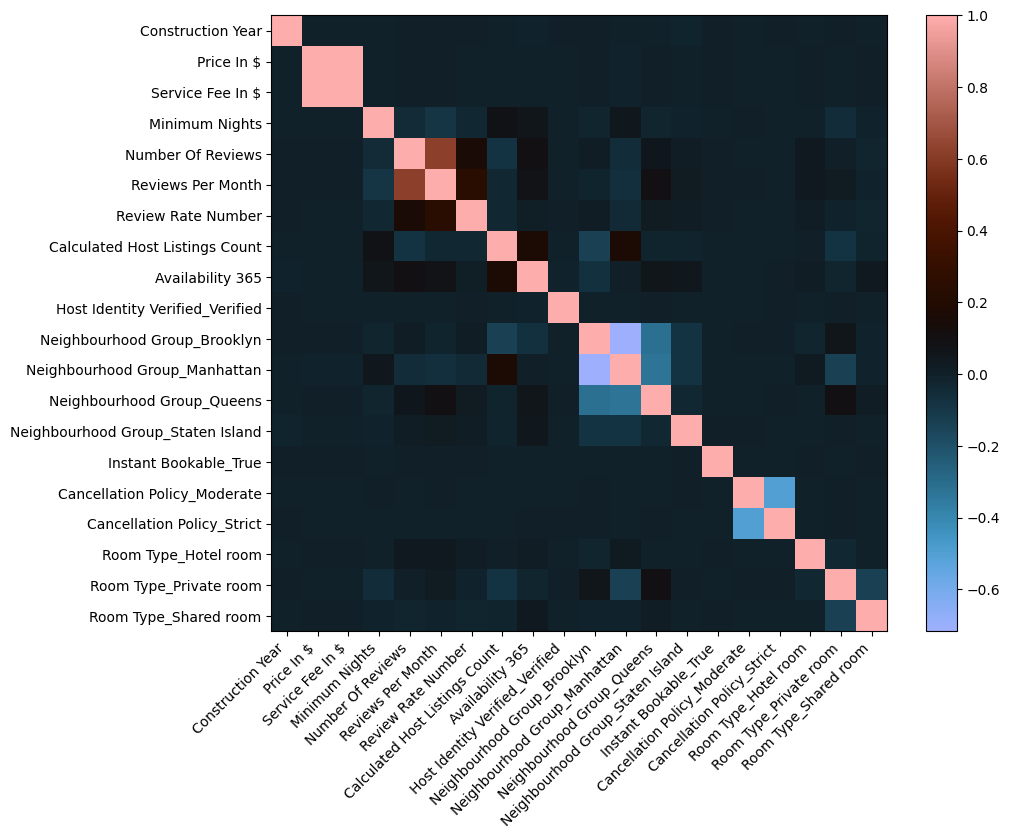

In [ ]:
list_not_corr = ["Id", "Host Id", "Neighbourhood", "Lat", "Long"]
df_corr = df.drop(columns=list_not_corr)
df_corr = pd.get_dummies(df_corr, columns=["Host Identity Verified", "Neighbourhood Group", "Instant Bookable", "Cancellation Policy", "Room Type"], drop_first=True, dtype=int)

fig = plt.figure(figsize=(10, 8))

corr = df_corr.select_dtypes(include="number").corr()
plt.imshow(corr, cmap="berlin")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)
plt.xticks()

plt.show()

Pelo mapa de calor, é possível confirmar que `Service Fee In $` apresenta uma correlação praticamente perfeita com `Price In $`, o que indica uma relação linear praticamente constante entre elas, permitindo que `Service Fee In $` seja descartada. Além disso é possivel notar que `Price In $`, `Host Identity Verified_Verified` e `Instant Bookable_True` apresentam baixíssima ou quase nenhuma correlação com as demais colunas, o que indica ausencia de relações lineares fortes entre elas.

In [ ]:
if "Service Fee In $" in df.columns:
    df.drop(columns="Service Fee In $", inplace=True)
    print("'Service Fee In $' removida!")

'Service Fee In $' removida!


O gráfico de caixa ou boxplot, permite visualizar a distribuição de um conjunto de dados e seus outlayers.

<Axes: xlabel='Availability 365'>

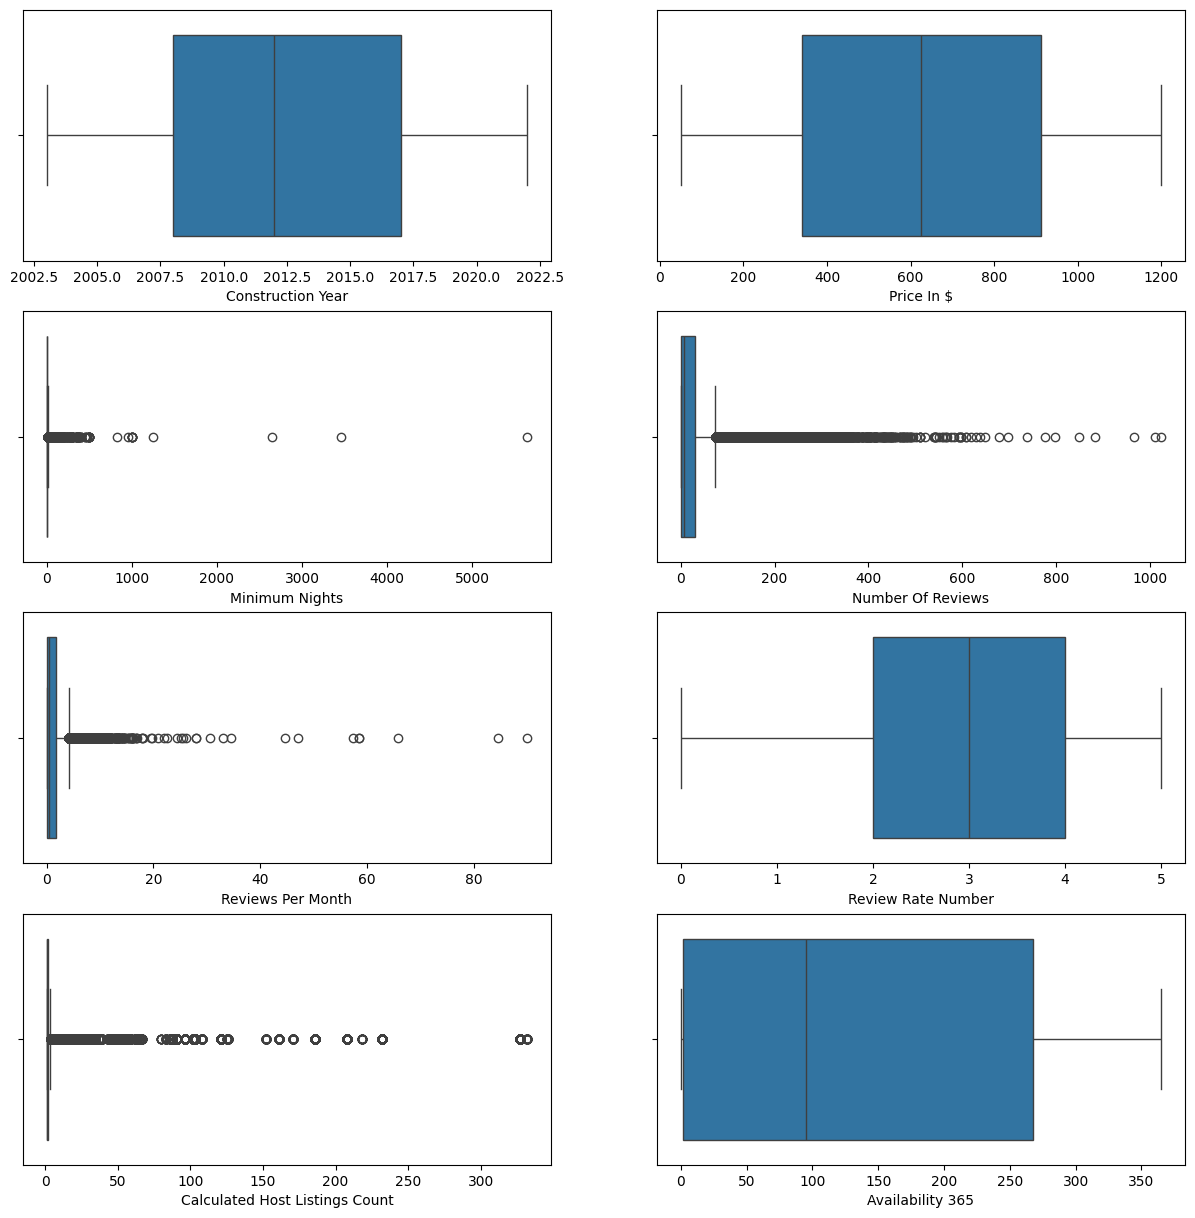

In [ ]:
hist_list = df.drop(columns=["Id", "Host Id", "Lat", "Long"]).select_dtypes(include="number")

fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.boxplot(data=hist_list.iloc[:, 0], orient="h", ax=axs[0][0])
sns.boxplot(data=hist_list.iloc[:, 1], orient="h", ax=axs[0][1])
sns.boxplot(data=hist_list.iloc[:, 2], orient="h", ax=axs[1][0])
sns.boxplot(data=hist_list.iloc[:, 3], orient="h", ax=axs[1][1])
sns.boxplot(data=hist_list.iloc[:, 4], orient="h", ax=axs[2][0])
sns.boxplot(data=hist_list.iloc[:, 5], orient="h", ax=axs[2][1])
sns.boxplot(data=hist_list.iloc[:, 6], orient="h", ax=axs[3][0])
sns.boxplot(data=hist_list.iloc[:, 7], orient="h", ax=axs[3][1])

A coluna `Minimum Nights`, possui outliers que chamam atenção, porque seus dados representam a quantidade de dias corridos, e entre suas linhas existem valores superiores a 730 dias, ou seja, superior a 2 anos, um valor elevado a primeira vista, já que o Airbnb é conhecido por alugueis curtos, entretanto não existem evidências suficientes que permitam confirmar a existencia de algum erro. As colunas `Number of Reviews` e `Review Per Month` demonstram que dentre os imoveis disponiveis para locação, existem aqueles que recebem uma quantidade elevada de reviews, o que pode indicar que estes sejam extremamente requisitados, demonstrando a rotatividade, com alugueis rápidos e consecutivos, e ou a aceitação deste imóvel. No segundo caso, pode-se verificar se a aceitação se deve a localidade, ao tipo de quarto ou ao preço, e criar um espécie de roteiro das melhores práticas, disponibilizados aos anfitriões de cada imóvel, a fim de elevar a expectativa do cliente. Já a coluna `Calculated Host Listings Count`, nos traz a informação de que existem uma quantidade elevada de anfitriões com mais de 1 imóvel listado, o que pode demonstrar a existência de um caminho, tanto para a plataforma aumentar seus lucros quanto para aumentar a quantidade de imóveis disponíveis, incentivando novas listagens do mesmo anfitrião por meio de desconto progressivos nos planos, por cada nova listagem.

É possível extrair considerações importantes da coluna `Neighbourhood Group`, combinando-a as colunas `Cancellation Policy`, `Room Type`, `Construction Year`, `Price In $`, `Review Rate Number` e `Id`.

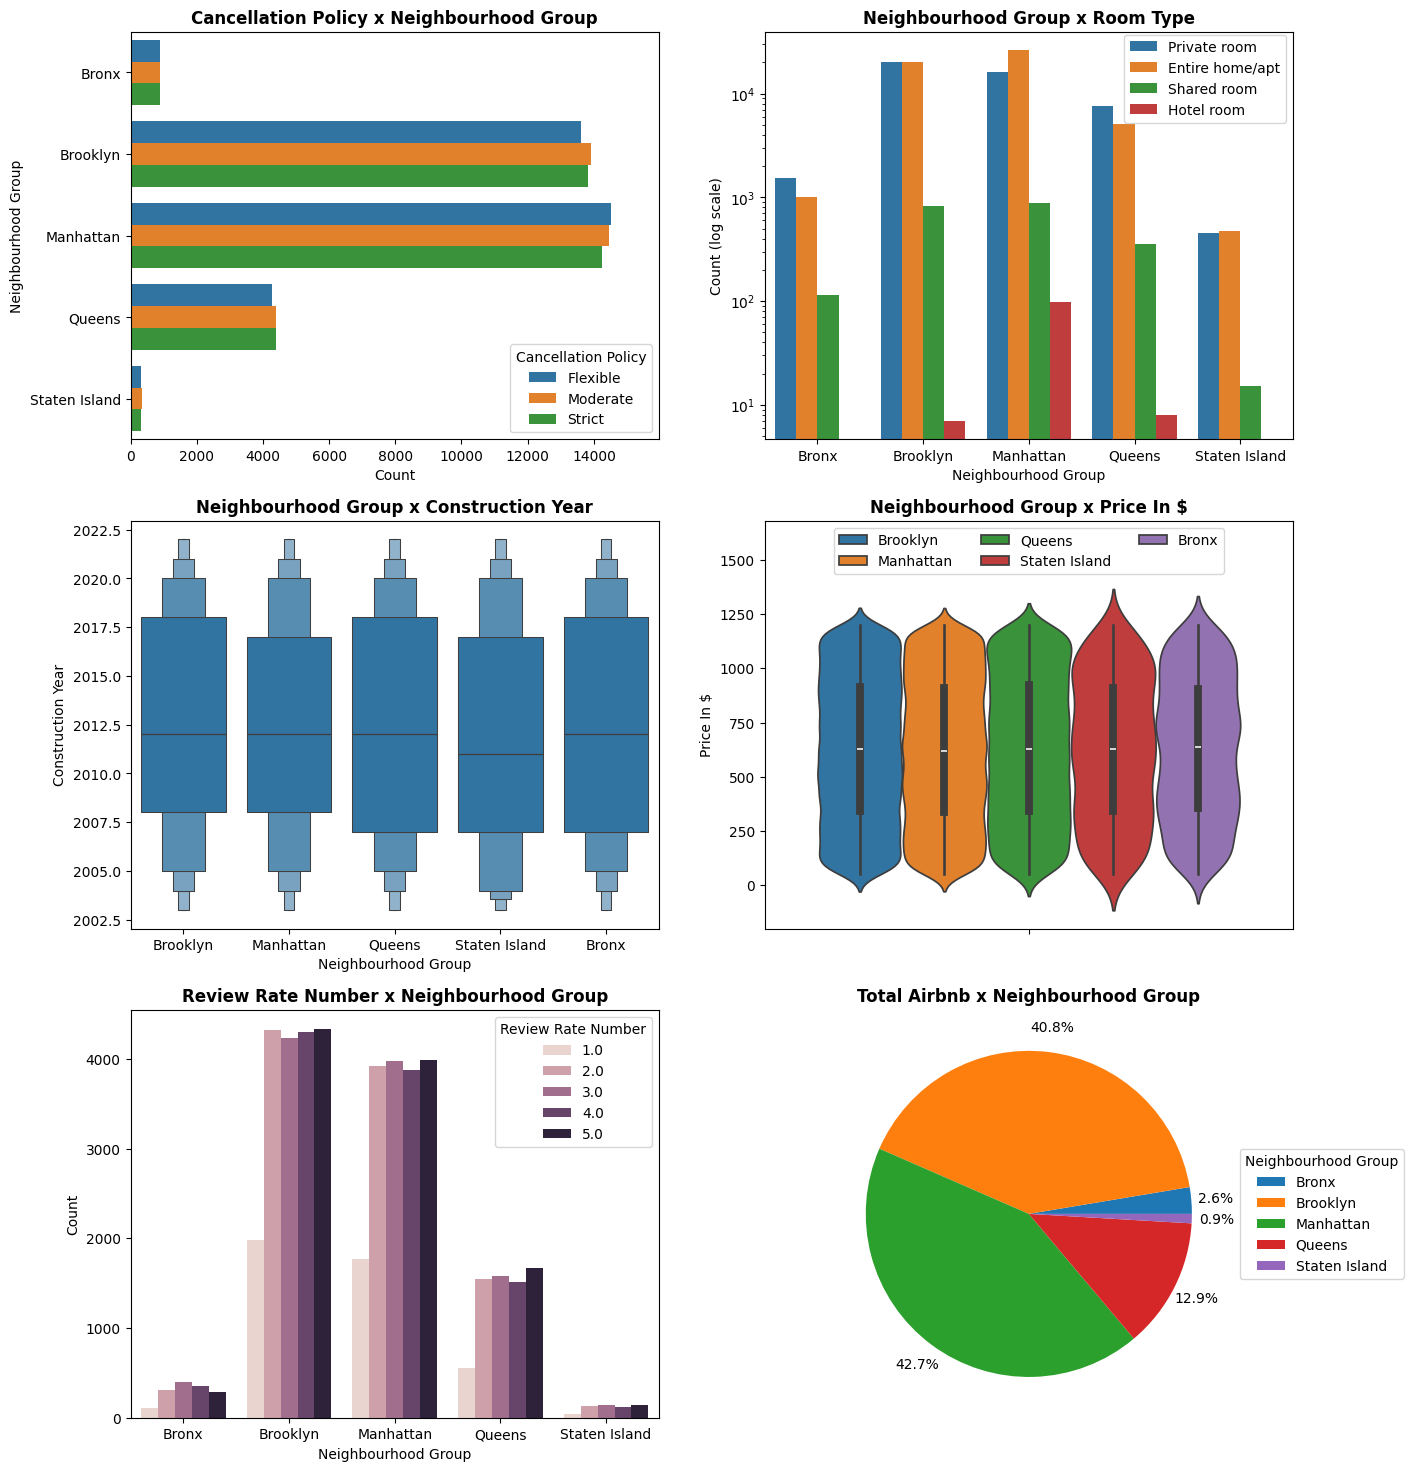

In [ ]:
# "Neighbourhood Group", => ["Cancellation Policy", "Room Type", "Construction Year", "Price In $", "Review Rate Number"] 
fig, axs = plt.subplots(3, 2, figsize=(15, 18))

ng_cp = df.groupby(["Neighbourhood Group"])["Cancellation Policy"].value_counts().reset_index(name="Count")
sns.barplot(data=ng_cp, x="Count", y="Neighbourhood Group", hue="Cancellation Policy", ax=axs[0][0])
axs[0][0].set_title("Cancellation Policy x Neighbourhood Group", weight="bold")
axs[0][0].set_xlim(0, ng_cp["Count"].max()*1.1)
axs[0][0].xaxis

ng_rt = df.groupby(["Neighbourhood Group"])["Room Type"].value_counts().reset_index(name="Count")
sns.barplot(data=ng_rt, x="Neighbourhood Group", y="Count", hue="Room Type", ax=axs[0][1])
axs[0][1].set_title("Neighbourhood Group x Room Type", weight="bold")
axs[0][1].set(yscale="log", ylabel="Count (log scale)")
axs[0][1].legend(loc="upper right", bbox_to_anchor=(1, 1.01))

ng_cy = df.loc[:, ["Neighbourhood Group", "Construction Year"]]
sns.boxenplot(data=ng_cy, x="Neighbourhood Group", y="Construction Year", ax=axs[1][0])
axs[1][0].set_title("Neighbourhood Group x Construction Year", weight="bold")

ng_p = df.loc[:, ["Neighbourhood Group", "Price In $"]]
sns.violinplot(data=ng_p, y="Price In $", hue="Neighbourhood Group", ax=axs[1][1])
axs[1][1].set_title("Neighbourhood Group x Price In $", weight="bold")
axs[1][1].set_ylim(ng_p["Price In $"].min()*-4, ng_p["Price In $"].max()*1.4)
axs[1][1].legend(loc="upper center", ncols=3)

ng_rrn = df.loc[df["Number Of Reviews"] >= 10]
ng_rrn = ng_rrn.groupby(["Neighbourhood Group"])["Review Rate Number"].value_counts().reset_index(name="Count")
sns.barplot(data=ng_rrn, x="Neighbourhood Group", y="Count", hue="Review Rate Number", ax=axs[2][0])
axs[2][0].set_title("Review Rate Number x Neighbourhood Group", weight="bold")

ng_id = df.groupby(["Neighbourhood Group"])["Id"].nunique()
ng_id.plot(kind="pie", autopct="%1.1f%%", pctdistance=1.15, labels=None, ax=axs[2][1])
axs[2][1].legend(ng_id.index, title="Neighbourhood Group", loc="center left", bbox_to_anchor=(1.0, .5))
axs[2][1].set(ylabel=None)
axs[2][1].set_title("Total Airbnb x Neighbourhood Group", weight="bold")


plt.show()


A coluna `Neighbourhood Group` pode trazer informaçoes importantes, ela agrupa em apenas 5 regiões, um total de 224 bairros, permitindo uma análise limpa da distribuição geográfica dos anúncios do Airbnb. Quando comparada com `Room Type`, é possível verificar que os tipos de Airbnb mais disponibilizados para locação, são `Private room` e `Entire home/apt`, essas informações indicam que talvez essa baixa oferta entre quartos do tipo `Hotel room` seja uma lacuna de mercado, principalmente em regiões como o Bronx e Staten Island, locais onde quartos desse tipo são inexistentes. Os imóveis disponibilizados para locação no Airbnb dependem de anúncios de terceiros, então é impossível para a plataforma disponibilizar todas as modalidades de quartos, sendo assim, oferecer valores diferinciados ou ofertas para anúncios de `Room Type` pouco ofertados, poderia incentivar a disponibilização de mais quartos dessa modalidade para locação.

Para visualizar a distribuição de preços entre as regiões, é possivel criar semi-regiões entre o valor mínimo e o valor máximo com o método `cut`, isso possibilita reduzir e reagrupar datasets extensos, em grupos de valores menores. Isso será feito entre as colunas `Price In $` e `Room Type`.

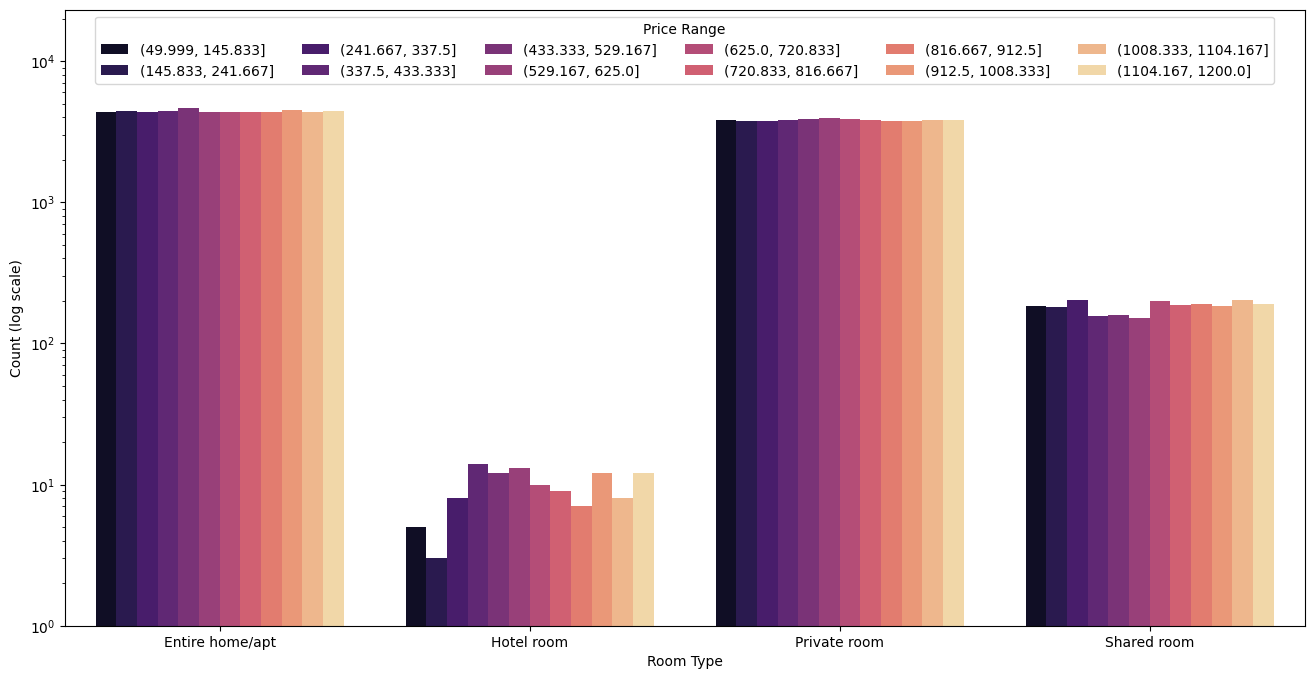

In [ ]:
# "Room Type", => ["Construction Year", "Price In $", "Minimum Nights", "Availability 365"]  
fig, ax = plt.subplots(figsize=(16, 8))

lim = np.linspace(df["Price In $"].min(), df["Price In $"].max(), 13)
df["Price Range"] = pd.cut(df["Price In $"], bins=lim, include_lowest=True)
rt_p = df.groupby(["Room Type"])["Price Range"].value_counts().reset_index(name="Count")
sns.barplot(data=rt_p, x="Room Type", y="Count", hue="Price Range", palette="magma", ax=ax)
ax.set(yscale="log", ylabel="Count (log scale)", ylim=(1, rt_p["Count"].max()*5))
ax.legend(title="Price Range", loc="upper center", ncols=6)

plt.show()

É possível notar que as distribuições de preços na coluna `Room Type`, são relativamente semelhantes, por esse motivo não é possível explicar o preço a partir do tipo de quarto. Porém algo que esse gráfico revela, é que `Hotel room` é o tipo de quarto menos disponibilizado para locação, sugerindo uma limitação na oferta desse tipo de segmento e reforçando a existência de uma margem para a ampliação dessa modalidade de quarto na plataforma.

Outra excelente forma de verificar distribuição de dados é por meio do gráfico de waffle, extraido da biblioteca pywaffle, ele gera uma sequencia de figuras ordenadas em que as features são separadas em cores.

Text(0.5, 1.0, 'Neighbourhood Group with the best-rated Airbnbs.')

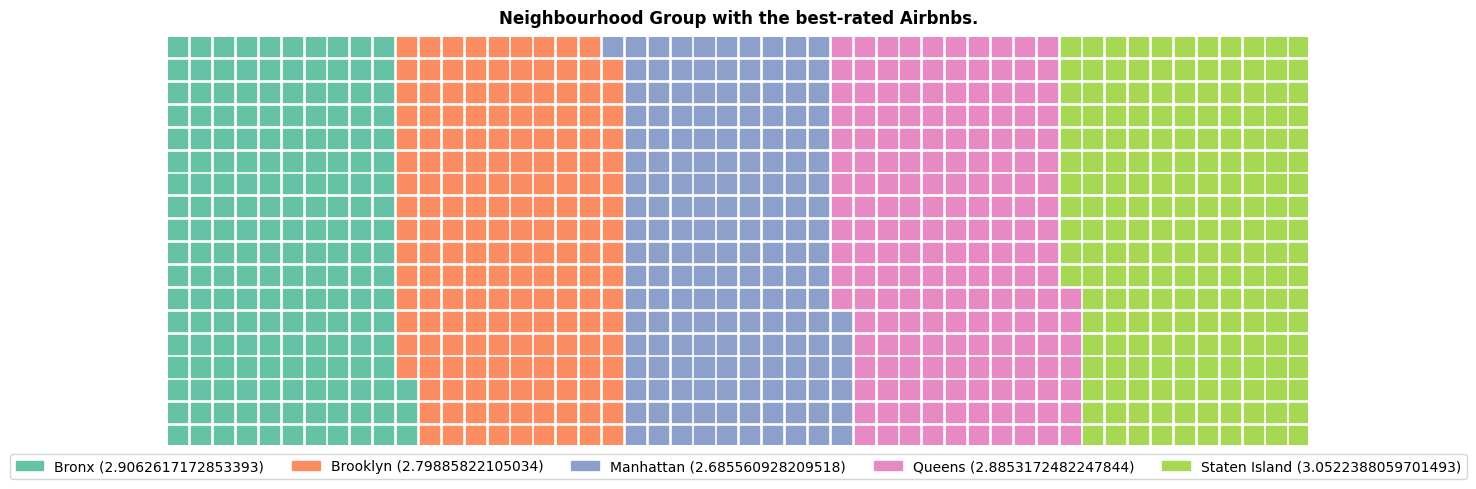

In [ ]:
from pywaffle import Waffle

df2 = df.groupby(["Neighbourhood Group"])["Review Rate Number"].mean()

fig = plt.figure(FigureClass=Waffle, figsize=(15, 5), rows=18, columns=50, values=df2, legend = {"labels": [f"{i} ({v})" for i, v in zip(df2.index, df2.values)], "loc":"lower center", "bbox_to_anchor":(.5, -.1), "ncols":5})
plt.title("Neighbourhood Group with the best-rated Airbnbs.", fontweight="bold", pad=10)


O gráfico de waffle está sendo utilizado para representar visualmente os valores médios da coluna `Review Rate Number` em cada uma das regiões da coluna `Neighbourhood Group`. Nesse caso, as médias deram valores extremamente próximos, então a diferença visual não é muito aparente, porém é possível notar que nas regiões do Bronx e Staten Island, são as que em média receberam as maiores notas, já a região de Manhattan a menor. Vale notar que Bronx e Staten Island são cidades menores e com menos imóveis para locação, então consequentemente o total de avaliações é consideravelmente menor, gerando médias mais sensíveis a variações e menos consistentes, já a região de Manhattan é a que detém a maior quantidade, resultando em médias com baixa oscilação. Porém cabe uma verificação aprofundada, para averiguar se a menor avaliação média em cidades maiores, não se deve a uma menor satisfação dos usuários nessa região.

As colunas `Lat` e `Long` são colunas de geolocalização, que podem ser usadas para exibir no mapa informações relevantes, como a concentração de imóveis disponíveis para locação em cada bairro.
Já o Wordcloud permite visualizar valores categóricos, em uma agrupamento de palavras, reproduzindo a frenquência das palavras no tamanho de sua fonte. é possível utilizar este método na coluna Neighbourhood, para verificar os bairros com mais Airbnb disponíveis.

In [ ]:
latlong_mean = df.groupby(["Neighbourhood"])[["Lat", "Long"]].agg("mean").reset_index()
latlong_mean["Count"] = df.groupby(["Neighbourhood"])["Lat"].count().values
lat_mean = df["Lat"].mean()
long_mean = df["Long"].mean()
max_count = latlong_mean["Count"].max()

def scale_radius(x):
    return 5 + (x / max_count) * 30

carto = flm.Map(location=[lat_mean, long_mean], zoom_start=10, tiles="CartoDB positron")

for _, row in latlong_mean.iterrows():
    popup_html=f"""
            <div style='max-width:200px; display:flex; flex-direction:column; align-items:center; white-space:nowrap'>
                <b>{row['Neighbourhood']}</b><br>
                <span>Count: ({row['Count']})</span>
            </div>
            """
    popup=flm.Popup(popup_html)

    flm.CircleMarker(
        location=[row["Lat"], row["Long"]],
        color=None,
        weight=0,
        radius=scale_radius(row["Count"]),
        fill=True,
        fill_color="#4444aa",
        fill_opacity=.5,
        popup=popup
        
    ).add_to(carto)

# Para visualizar com wsl:
# carto.save("../outputs/carto.html")
# sbp.Popen(["explorer.exe", "../outputs/carto.html"])

carto

<Popen: returncode: None args: ['explorer.exe', 'carto.html']>

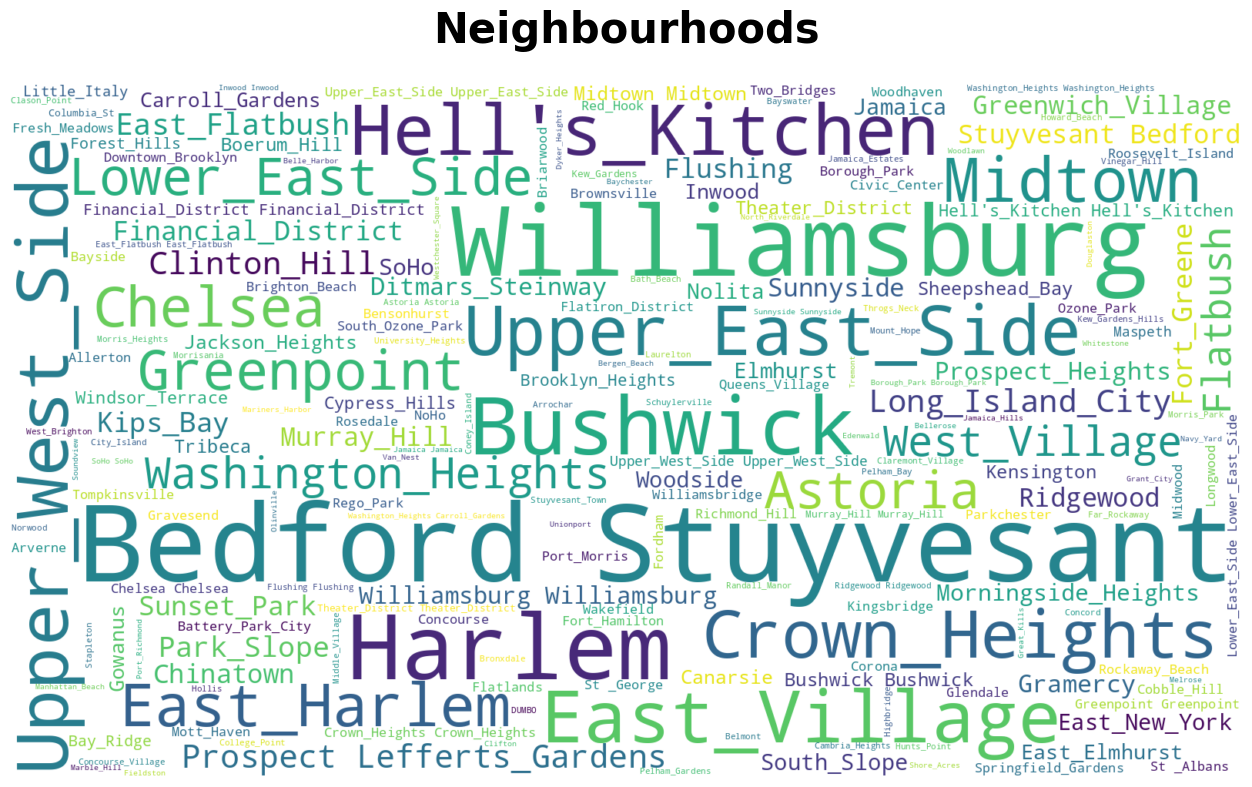

In [ ]:
from wordcloud import WordCloud, STOPWORDS

fig = plt.figure(figsize=(16, 9))
text = " ".join(df["Neighbourhood"].astype(str).str.replace(" ", "_"))

wc = WordCloud(
    background_color="white",
    width=1600,
    height=900,
).generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis(False)
plt.title("Neighbourhoods", pad=30, fontsize=30, weight="bold")

plt.show()

Tanto o Follium quanto o Wordcloud foram usados com o objetivo de exibir a quantidade de imóveis listados na plataforma da Airbnb em cada um dos bairros. No Folium, essa informação é retratada por meio do diametro de cada circulo no mapa, já no Wordcloud pelo tamanho da fonte de cada palavra. A partir desses gráficos, é possível confirmar a existencia de varios bairros com poucos imóveis listados, sugerindo que nessas localidades existem margem para que mais imóveis sejam listados.